## sentiment analysis

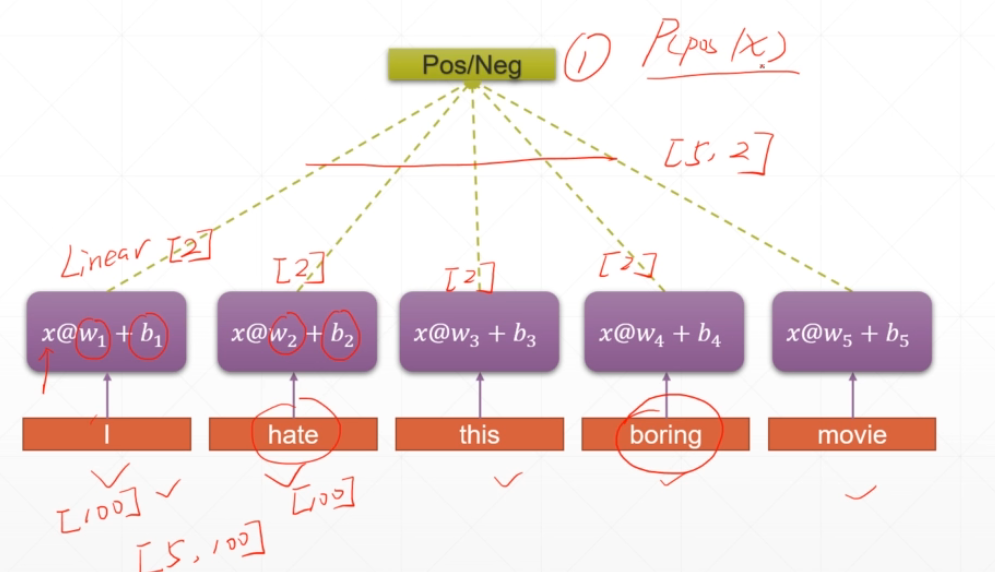

## Flaws

* Long Sentence
   * 100+ words
   * too much parameters [w,b]
* no context information
   * consistent tensor

## Weight sharing

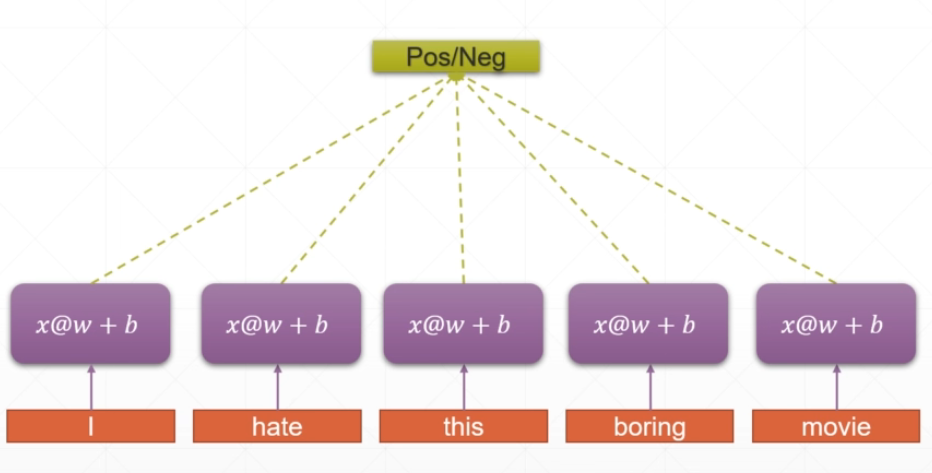

## consistent memory

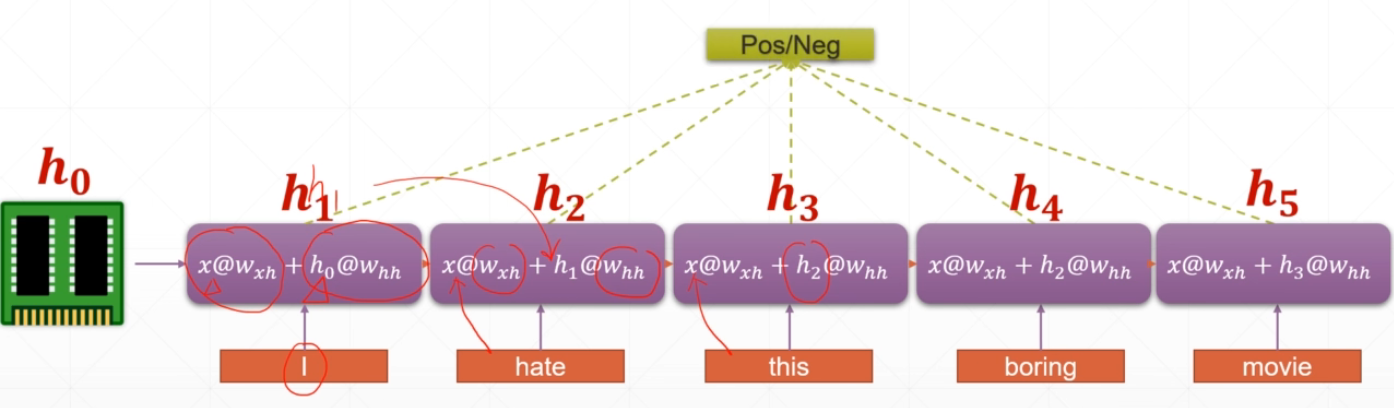

## Folded model

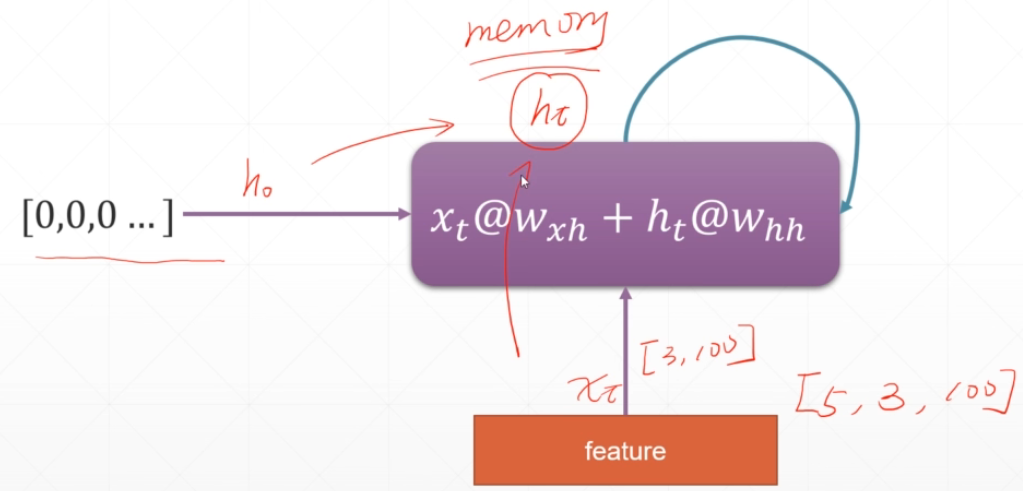

## unfolded model

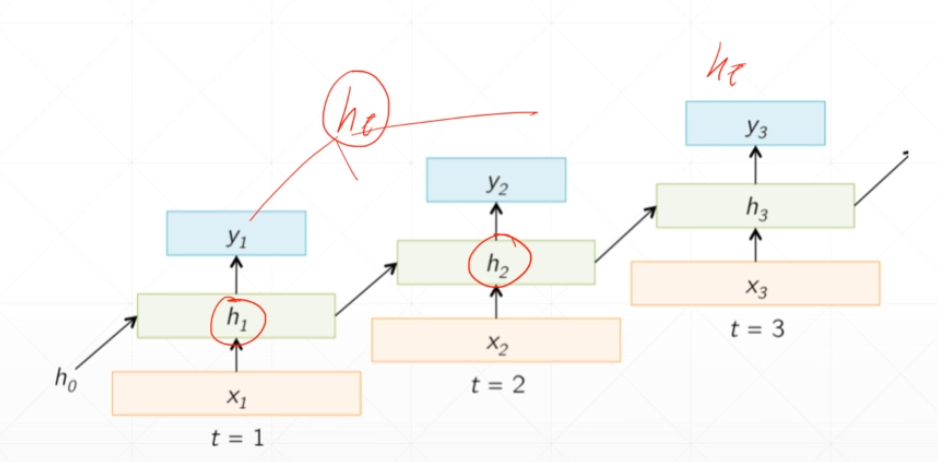

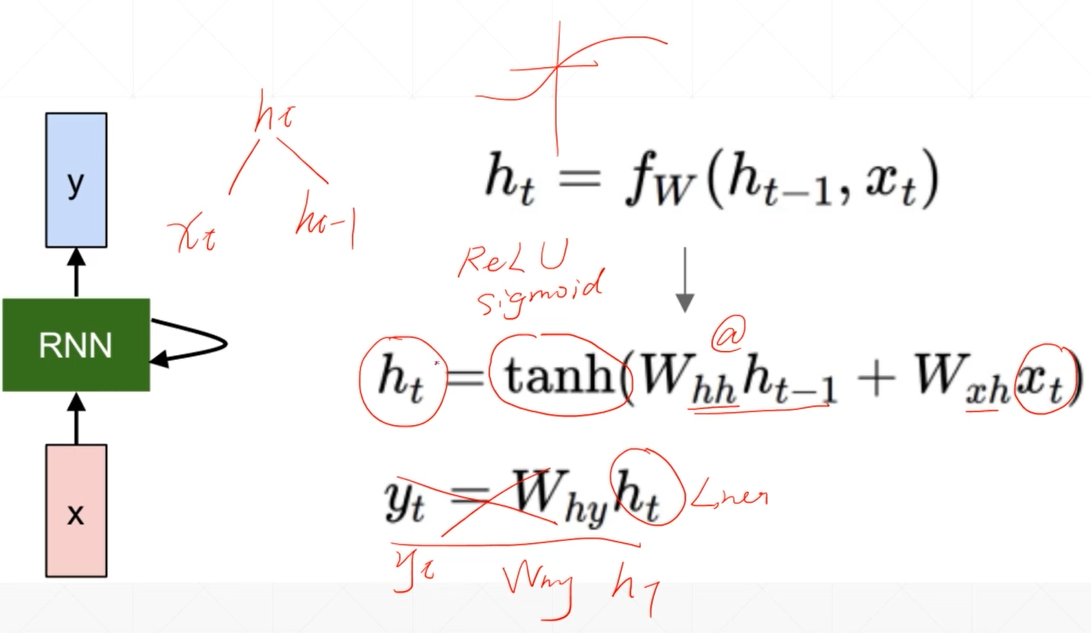

## How To Train?

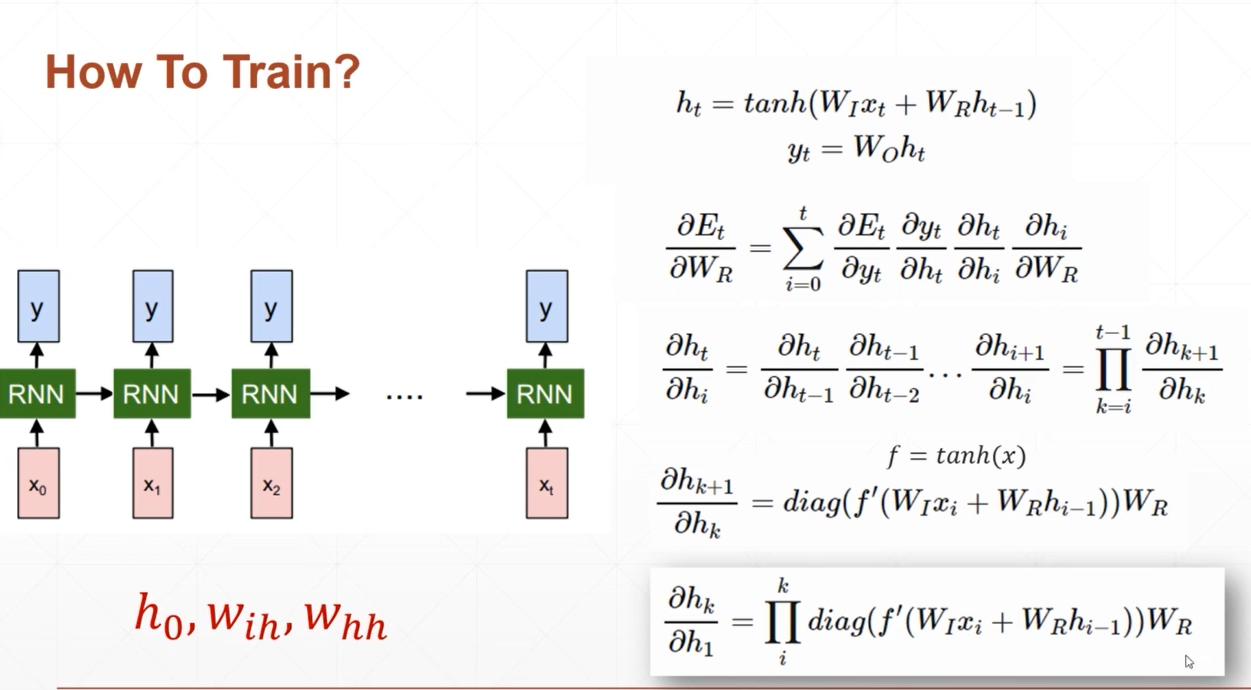  
$W_R = W_{hh}$

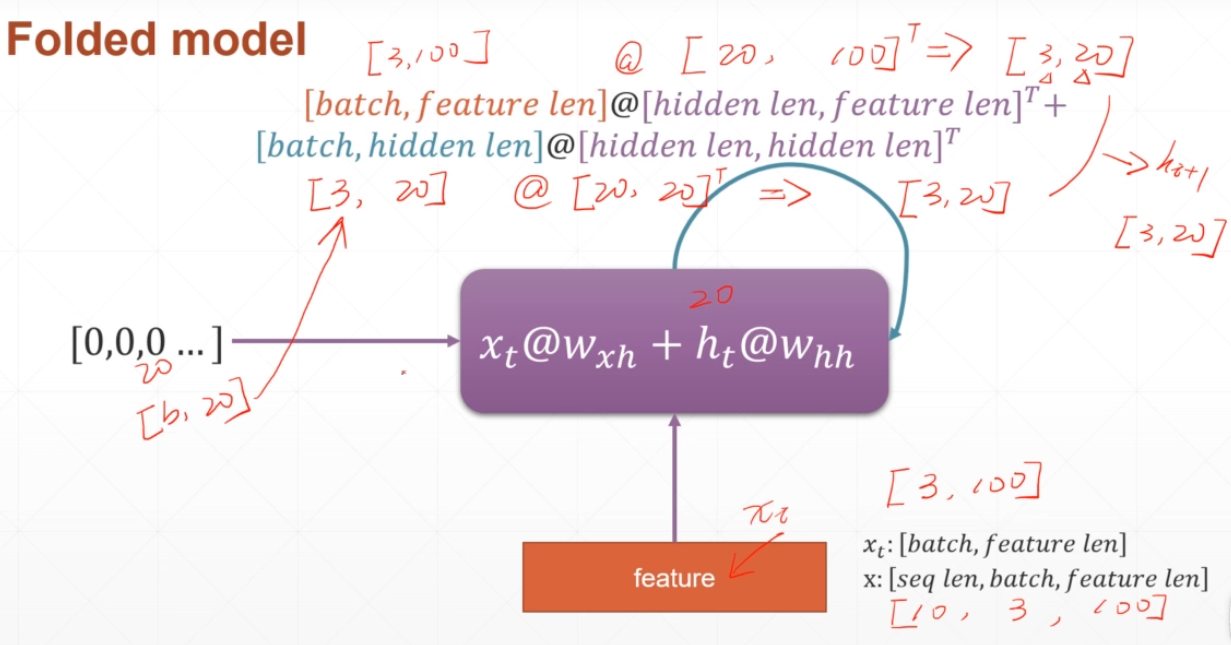

## input dim, hidden dim

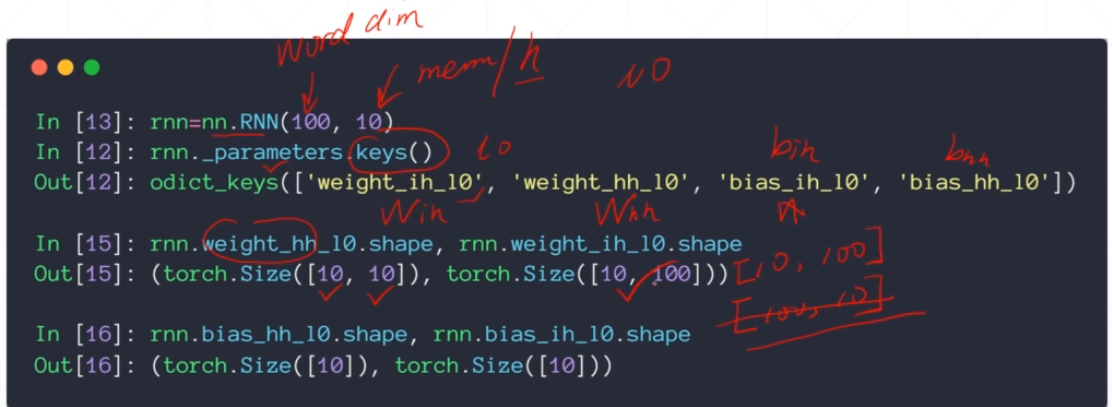

## nn.RNN

 * ###  __init__  
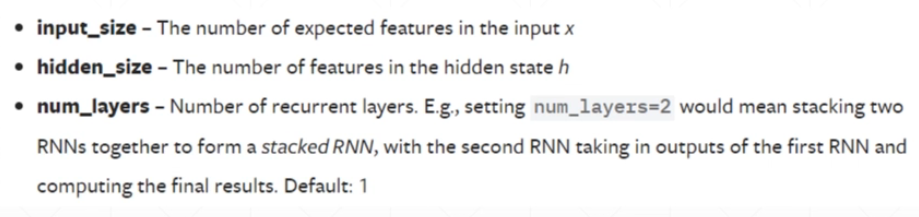  
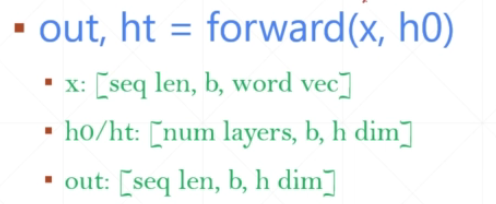

## Single Layer RNN

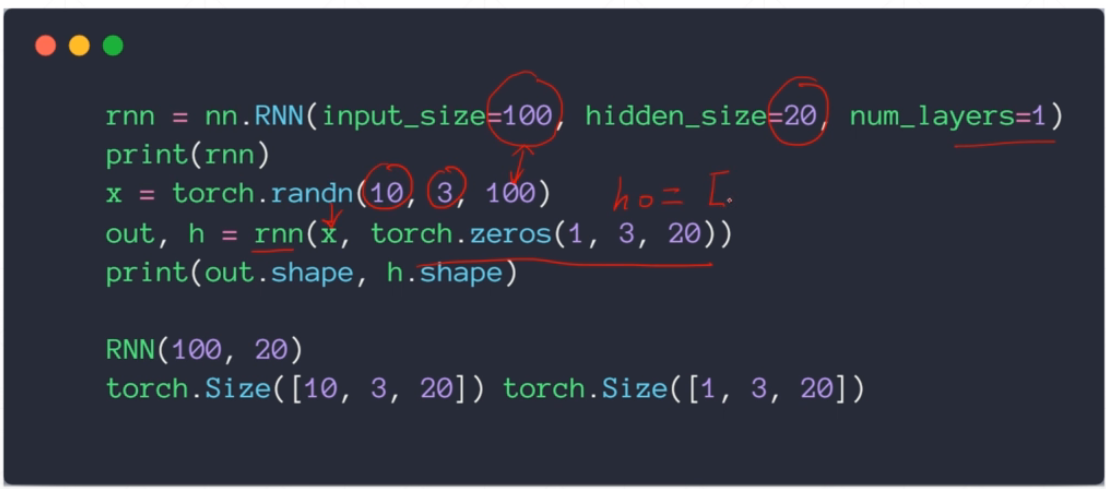

## 2 layer RNN

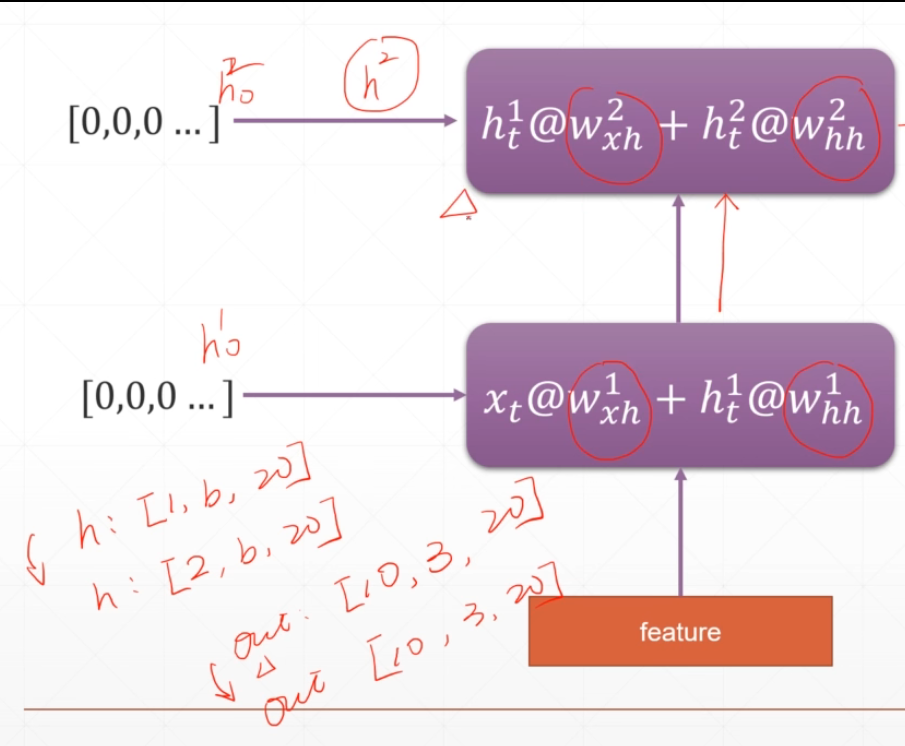

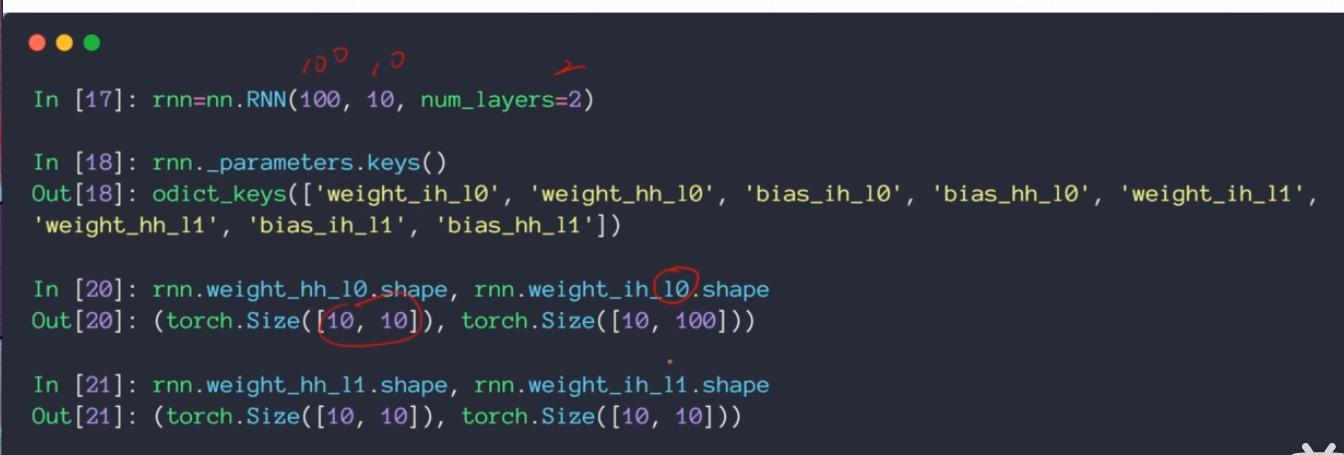

## nn.RNNCell （不加循环的RNN）
*  ### __init__  
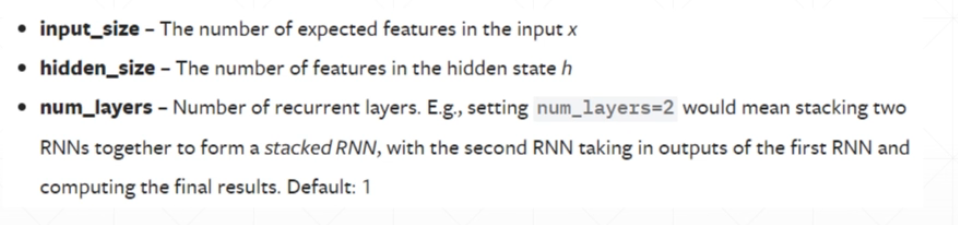


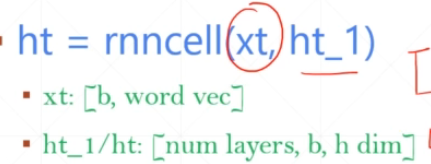

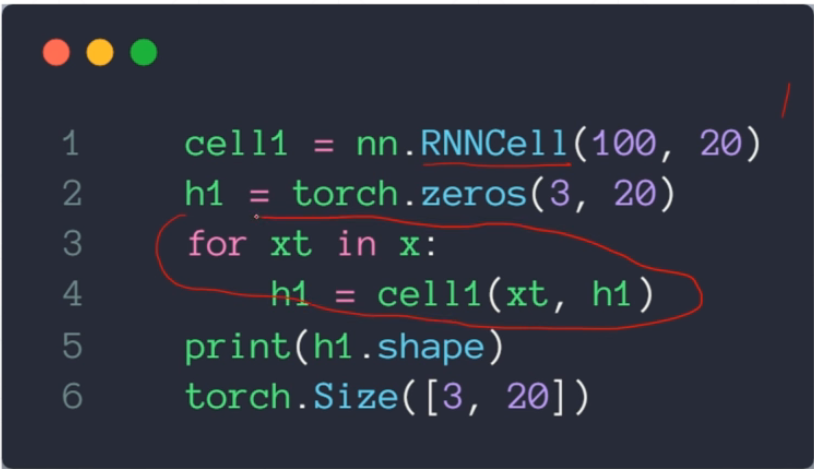

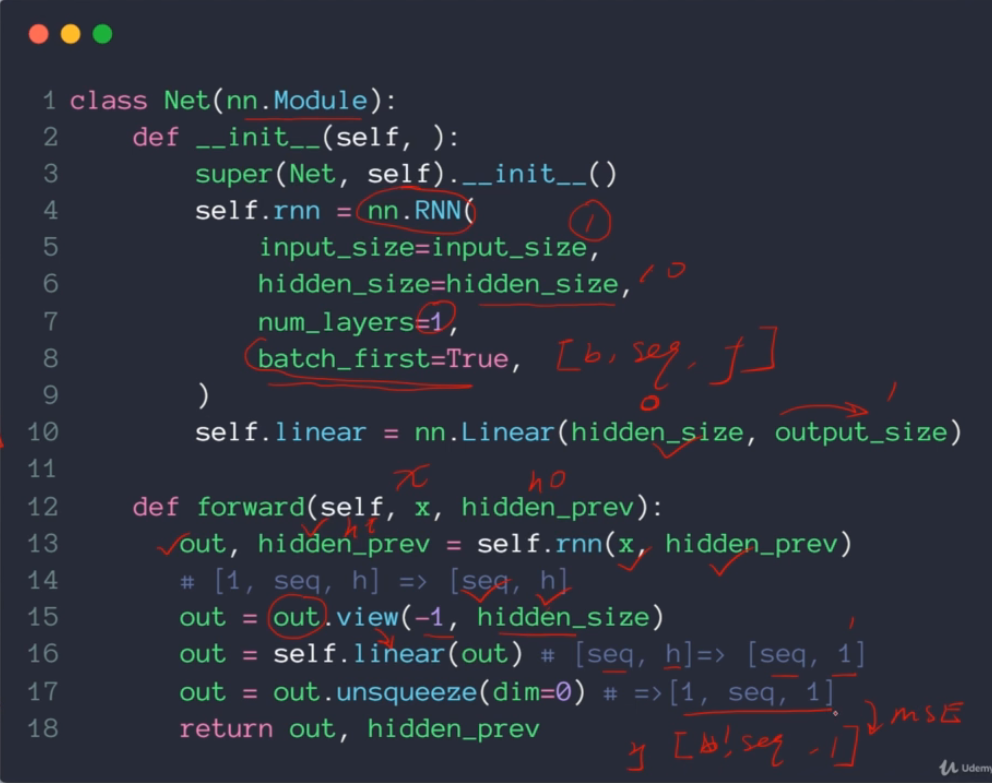

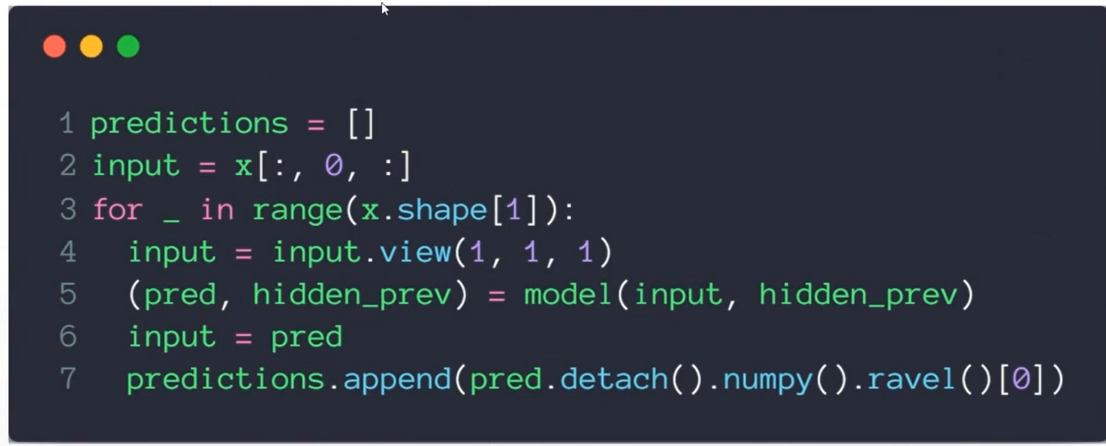

Iteration: 0 loss 0.6088349223136902
Iteration: 1000 loss 0.004246579483151436
Iteration: 2000 loss 0.004749894142150879
Iteration: 3000 loss 0.0001454743614885956
Iteration: 4000 loss 0.00093221222050488
Iteration: 5000 loss 0.0010898876935243607


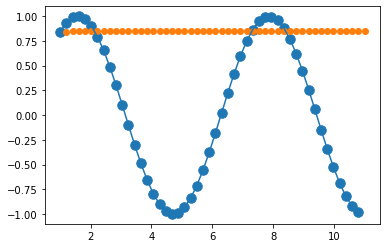

In [4]:
import  numpy as np
import  torch
import  torch.nn as nn
import  torch.optim as optim
from    matplotlib import pyplot as plt


num_time_steps = 50
input_size = 1
hidden_size = 16
output_size = 1
lr=0.01



class Net(nn.Module):

    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )
        for p in self.rnn.parameters():
          nn.init.normal_(p, mean=0.0, std=0.001)

        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):

       out, hidden_prev = self.rnn(x, hidden_prev)
    
       # [b, seq, h]
       out = out.view(-1, hidden_size)
       out = self.linear(out)
       out = out.unsqueeze(dim=0)
       return out, hidden_prev




model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)

hidden_prev = torch.zeros(1, 1, hidden_size)

for iter in range(6000):
    start = np.random.randint(3, size=1)[0]
    time_steps = np.linspace(start, start + 10, num_time_steps)
    data = np.sin(time_steps)
    data = data.reshape(num_time_steps, 1)
    x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1) # 前0-48的所有的值
    y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)  # 前1-49的所有的值

    output, hidden_prev = model(x, hidden_prev)
    hidden_prev = hidden_prev.detach()
    
    loss = criterion(output, y)
    model.zero_grad()
    loss.backward()
    # for p in model.parameters():
    #     print(p.grad.norm())
    # torch.nn.utils.clip_grad_norm_(p, 10)
    optimizer.step()

    if iter % 1000 == 0:
        print("Iteration: {} loss {}".format(iter, loss.item()))

start = np.random.randint(3, size=1)[0]
time_steps = np.linspace(start, start + 10, num_time_steps)
data = np.sin(time_steps)
data = data.reshape(num_time_steps, 1)
x = torch.tensor(data[:-1]).float().view(1, num_time_steps - 1, 1)
y = torch.tensor(data[1:]).float().view(1, num_time_steps - 1, 1)

predictions = []
input = x[:, 0, :]
for _ in range(x.shape[1]):
  input = input.view(1, 1, 1)
  (pred, hidden_prev) = model(input, hidden_prev)
  input = pred
  predictions.append(pred.detach().numpy().ravel()[0])

x = x.data.numpy().ravel()
y = y.data.numpy()
plt.scatter(time_steps[:-1], x.ravel(), s=90)
plt.plot(time_steps[:-1], x.ravel())

plt.scatter(time_steps[1:], predictions)
plt.show()

### RNN容易出现梯度爆炸或梯度消失的现象  所以要使用clipping处理一下

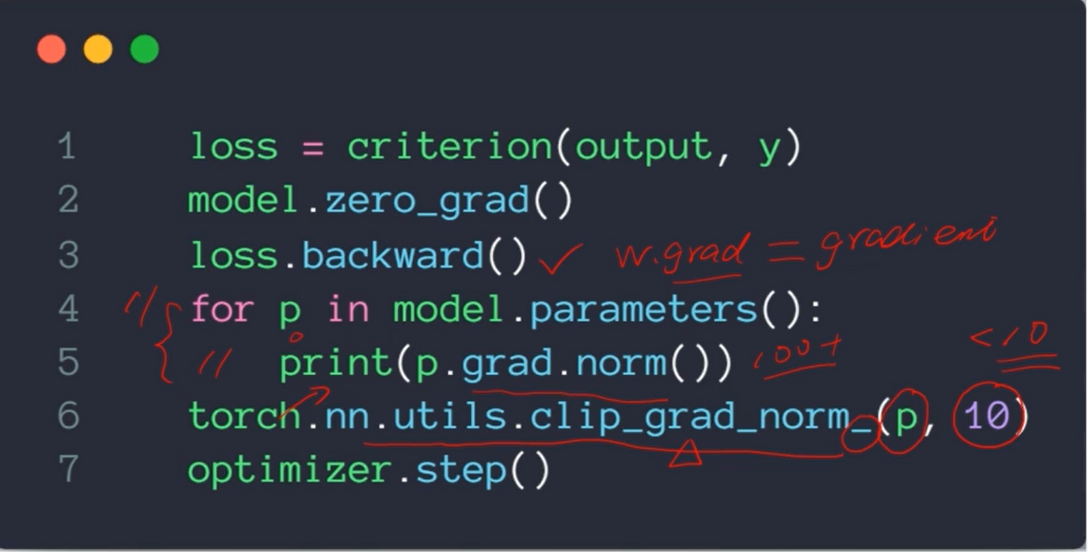